# Joining Data in SQL Cheat Sheet
The original code and cheat sheet information is located here: https://www.datacamp.com/cheat-sheet/sql-joins-cheat-sheet **Note:** The DataCamp PDF and website version have multiple issues. 

The following includes the datasets and corrected queries and corresponding output. It uses [DuckDB](https://duckdb.org/) as the database and [magic_duckdb](https://github.com/iqmo-org/magic_duckdb) for cell magics in Jupyter. 


In [1]:
%load_ext magic_duckdb
%dql -d

## Artist Table

|   artist_id | name              |
|------------:|:------------------|
|           1 | AC/DC             |
|           2 | Aerosmtih         |
|           3 | Alanis Morissette |

In [30]:
%%dql
-- SQL statements to create the artist table.
DROP TABLE IF EXISTS artist;
-- Create the table
CREATE TABLE IF NOT EXISTS artist (
    artist_id INT,
    name TEXT
);

-- Insert values into the table
INSERT INTO artist (artist_id, name)
VALUES
    (1, 'AC/DC'),
    (2, 'Aerosmtih'),
    (3, 'Alanis Morissette');


,Count
0,3


In [34]:
%dql -t show SELECT * FROM artist;

┌───────────┬───────────────────┐
│ artist_id │       name        │
│   int32   │      varchar      │
├───────────┼───────────────────┤
│         1 │ AC/DC             │
│         2 │ Aerosmtih         │
│         3 │ Alanis Morissette │
└───────────┴───────────────────┘



## Album Table
|   album_id | title              |   artist_id |
|-----------:|:-------------------|------------:|
|          1 | For those who rock |           1 |
|          2 | Dream on           |           2 |
|          3 | Restless and wild  |           2 |
|          4 | Let there be rock  |           1 |
|          5 | Rumours            |           6 |

In [36]:
%%dql
-- Create the album table, slightly different method used.
DROP TABLE IF EXISTS album;
CREATE TABLE IF NOT EXISTS album AS 
SELECT * FROM ( 
    VALUES
    (1, 'For those who rock', 1),
    (2, 'Dream on', 2),
    (3, 'Restless and wild', 2),
    (4, 'Let there be rock', 1),
    (5, 'Rumours', 6),
    ) AS album (album_id, title, artist_id);

,Count
0,5


In [35]:
%dql -t show SELECT * FROM album;

┌──────────┬────────────────────┬───────────┐
│ album_id │       title        │ artist_id │
│  int32   │      varchar       │   int32   │
├──────────┼────────────────────┼───────────┤
│        1 │ For those who rock │         1 │
│        2 │ Dream on           │         2 │
│        3 │ Restless and wild  │         2 │
│        4 │ Let there be rock  │         1 │
│        5 │ Rumours            │         6 │
└──────────┴────────────────────┴───────────┘



***
## INNER JOIN
An inner join between two tables will return only records where a joining field, such as a key, finds a match in both tables.

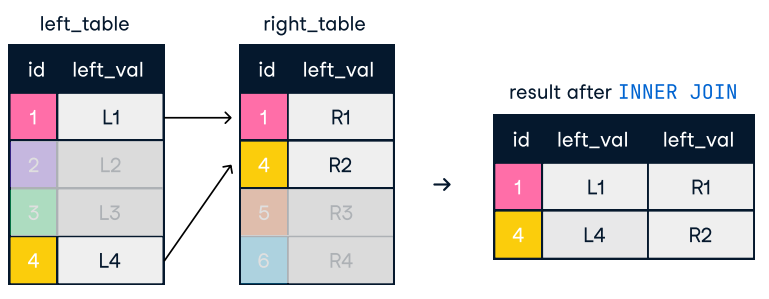


In [73]:
%%dql -t show
-- left_table
DROP TABLE IF EXISTS left_table;
CREATE TABLE IF NOT EXISTS left_table AS 
SELECT * FROM (
        VALUES
        (1, 'L1'),
        (2, 'L2'),
        (3, 'L3'),
        (4, 'L4')
        ) AS left_table (id, val);
FROM left_table;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ L1      │
│     2 │ L2      │
│     3 │ L3      │
│     4 │ L4      │
└───────┴─────────┘



In [74]:
%%dql -t show
-- right_table
DROP TABLE IF EXISTS right_table;
CREATE TABLE IF NOT EXISTS right_table AS 
SELECT * FROM (
        VALUES
        (1, 'R1'),
        (4, 'R2'),
        (5, 'R3'),
        (6, 'R4')
        ) AS right_table (id, val);
FROM right_table;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ R1      │
│     4 │ R2      │
│     5 │ R3      │
│     6 │ R4      │
└───────┴─────────┘



In [76]:
%%dql -t show
-- INNER JOIN with ON
SELECT * 
FROM left_table lt
INNER JOIN right_table rt
USING (id)

┌───────┬─────────┬─────────┐
│  id   │   val   │   val   │
│ int32 │ varchar │ varchar │
├───────┼─────────┼─────────┤
│     1 │ L1      │ R1      │
│     4 │ L4      │ R2      │
└───────┴─────────┴─────────┘



**INNER JOIN join ON one field**

In [39]:
%%dql -t show
-- INNER JOIN with ON
SELECT * 
FROM artist AS art
INNER JOIN album AS alb
ON art.artist_id = alb.artist_id;

┌───────────┬───────────┬──────────┬────────────────────┬───────────┐
│ artist_id │   name    │ album_id │       title        │ artist_id │
│   int32   │  varchar  │  int32   │      varchar       │   int32   │
├───────────┼───────────┼──────────┼────────────────────┼───────────┤
│         1 │ AC/DC     │        1 │ For those who rock │         1 │
│         2 │ Aerosmtih │        2 │ Dream on           │         2 │
│         2 │ Aerosmtih │        3 │ Restless and wild  │         2 │
│         1 │ AC/DC     │        4 │ Let there be rock  │         1 │
└───────────┴───────────┴──────────┴────────────────────┴───────────┘



**INNER JOIN with USING**


In [41]:
%%dql -t show
-- INNER JOIN with USING
SELECT * 
FROM artist AS art
INNER JOIN album AS alb
USING (artist_id);

┌───────────┬───────────┬──────────┬────────────────────┐
│ artist_id │   name    │ album_id │       title        │
│   int32   │  varchar  │  int32   │      varchar       │
├───────────┼───────────┼──────────┼────────────────────┤
│         1 │ AC/DC     │        1 │ For those who rock │
│         2 │ Aerosmtih │        2 │ Dream on           │
│         2 │ Aerosmtih │        3 │ Restless and wild  │
│         1 │ AC/DC     │        4 │ Let there be rock  │
└───────────┴───────────┴──────────┴────────────────────┘



***
## SELF JOIN
Self-joins are used to compare values in a table to other values of the same table by joining different parts 
of a table together.

In [45]:
%%dql -t show
-- SELF JOIN query
SELECT 
  alb1.artist_id,
  alb1.title AS alb1_title,
  alb2.title AS alb2_title
FROM album AS alb1
INNER JOIN album AS alb2
ON alb1.artist_id = alb2.album_id;

┌───────────┬────────────────────┬────────────────────┐
│ artist_id │     alb1_title     │     alb2_title     │
│   int32   │      varchar       │      varchar       │
├───────────┼────────────────────┼────────────────────┤
│         1 │ Let there be rock  │ For those who rock │
│         2 │ Restless and wild  │ Dream on           │
│         1 │ For those who rock │ For those who rock │
│         2 │ Dream on           │ Dream on           │
└───────────┴────────────────────┴────────────────────┘



> FYI - This isn't a very good example IMO. This [one](https://pgexercises.com/questions/joins/self.html) from [PostgreSQL Exercises](https://pgexercises.com/) is much better.

***
## LEFT JOIN
A left join keeps all of the original records in the left table and returns missing values for any columns from the right table where the joining field did not find a match.

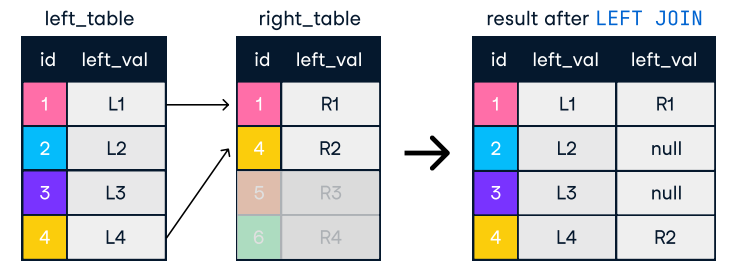



In [78]:
%%dql -t show
SELECT * 
FROM left_table 
LEFT JOIN right_table
USING (id)
ORDER BY id;

┌───────┬─────────┬─────────┐
│  id   │   val   │   val   │
│ int32 │ varchar │ varchar │
├───────┼─────────┼─────────┤
│     1 │ L1      │ R1      │
│     2 │ L2      │ NULL    │
│     3 │ L3      │ NULL    │
│     4 │ L4      │ R2      │
└───────┴─────────┴─────────┘



**Left JOIN on one field and output:**

In [47]:
%%dql -t show
-- LEFT JOIN with ON
SELECT * 
FROM artist AS art
LEFT JOIN album AS alb
ON alb.artist_id = art.artist_id
ORDER BY art.artist_id, album_id;

┌───────────┬───────────────────┬──────────┬────────────────────┬───────────┐
│ artist_id │       name        │ album_id │       title        │ artist_id │
│   int32   │      varchar      │  int32   │      varchar       │   int32   │
├───────────┼───────────────────┼──────────┼────────────────────┼───────────┤
│         1 │ AC/DC             │        1 │ For those who rock │         1 │
│         1 │ AC/DC             │        4 │ Let there be rock  │         1 │
│         2 │ Aerosmtih         │        2 │ Dream on           │         2 │
│         2 │ Aerosmtih         │        3 │ Restless and wild  │         2 │
│         3 │ Alanis Morissette │     NULL │ NULL               │      NULL │
└───────────┴───────────────────┴──────────┴────────────────────┴───────────┘



**Left JOIN with USING and output:**

In [49]:
%%dql -t show
-- LEFT JOIN with USING
SELECT *
FROM artist AS art
LEFT JOIN album AS alb
USING (artist_id)
ORDER BY art.artist_id, album_id;

┌───────────┬───────────────────┬──────────┬────────────────────┐
│ artist_id │       name        │ album_id │       title        │
│   int32   │      varchar      │  int32   │      varchar       │
├───────────┼───────────────────┼──────────┼────────────────────┤
│         1 │ AC/DC             │        1 │ For those who rock │
│         1 │ AC/DC             │        4 │ Let there be rock  │
│         2 │ Aerosmtih         │        2 │ Dream on           │
│         2 │ Aerosmtih         │        3 │ Restless and wild  │
│         3 │ Alanis Morissette │     NULL │ NULL               │
└───────────┴───────────────────┴──────────┴────────────────────┘



***
## RIGHT JOIN
A right join keeps all of the original records in the right table and returns missing values for any columns from the left table where the joining field did not find a match. Right joins are far less common than left joins, because right joins can always be rewritten as left joins.

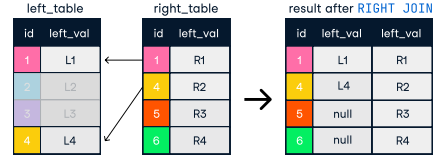

In [79]:
%%dql -t show
SELECT * 
FROM left_table 
RIGHT JOIN right_table
USING (id)
ORDER BY id;

┌───────┬─────────┬─────────┐
│  id   │   val   │   val   │
│ int32 │ varchar │ varchar │
├───────┼─────────┼─────────┤
│     1 │ L1      │ R1      │
│     4 │ L4      │ R2      │
│     5 │ NULL    │ R3      │
│     6 │ NULL    │ R4      │
└───────┴─────────┴─────────┘



**RIGHT JOIN on one field and output:**

In [50]:
%%dql -t show
-- RIGHT JOIN with ON
SELECT * 
FROM artist AS art
RIGHT JOIN album AS alb
ON art.artist_id = alb.artist_id
ORDER BY alb.album_id;

┌───────────┬───────────┬──────────┬────────────────────┬───────────┐
│ artist_id │   name    │ album_id │       title        │ artist_id │
│   int32   │  varchar  │  int32   │      varchar       │   int32   │
├───────────┼───────────┼──────────┼────────────────────┼───────────┤
│         1 │ AC/DC     │        1 │ For those who rock │         1 │
│         2 │ Aerosmtih │        2 │ Dream on           │         2 │
│         2 │ Aerosmtih │        3 │ Restless and wild  │         2 │
│         1 │ AC/DC     │        4 │ Let there be rock  │         1 │
│      NULL │ NULL      │        5 │ Rumours            │         6 │
└───────────┴───────────┴──────────┴────────────────────┴───────────┘



**RIGHT JOIN with USING and output:**

In [52]:
%%dql -t show
-- RIGHT JOIN with USING
SELECT * 
FROM artist AS art
RIGHT JOIN album AS alb
USING (artist_id)
ORDER BY alb.album_id;

┌───────────┬───────────┬──────────┬────────────────────┐
│ artist_id │   name    │ album_id │       title        │
│   int32   │  varchar  │  int32   │      varchar       │
├───────────┼───────────┼──────────┼────────────────────┤
│         1 │ AC/DC     │        1 │ For those who rock │
│         2 │ Aerosmtih │        2 │ Dream on           │
│         2 │ Aerosmtih │        3 │ Restless and wild  │
│         1 │ AC/DC     │        4 │ Let there be rock  │
│         6 │ NULL      │        5 │ Rumours            │
└───────────┴───────────┴──────────┴────────────────────┘



***
## FULL JOIN
A full join combines a left join and right join. A full join will return all records from a table, irrespective of whether there is a match on the joining field in the other table, returning null values accordingly.

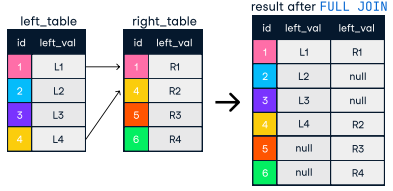

In [80]:
%%dql -t show
SELECT * 
FROM left_table 
FULL JOIN right_table
USING (id)
ORDER BY id;

┌───────┬─────────┬─────────┐
│  id   │   val   │   val   │
│ int32 │ varchar │ varchar │
├───────┼─────────┼─────────┤
│     1 │ L1      │ R1      │
│     2 │ L2      │ NULL    │
│     3 │ L3      │ NULL    │
│     4 │ L4      │ R2      │
│     5 │ NULL    │ R3      │
│     6 │ NULL    │ R4      │
└───────┴─────────┴─────────┘



**FULL OUTER JOIN on one field and output:**

In [53]:
%%dql -t show
-- FULL JOIN with ON
SELECT *
FROM artist AS art
FULL OUTER JOIN album AS alb
ON art.artist_id = alb.artist_id
ORDER BY art.artist_id;

┌───────────┬───────────────────┬──────────┬────────────────────┬───────────┐
│ artist_id │       name        │ album_id │       title        │ artist_id │
│   int32   │      varchar      │  int32   │      varchar       │   int32   │
├───────────┼───────────────────┼──────────┼────────────────────┼───────────┤
│         1 │ AC/DC             │        1 │ For those who rock │         1 │
│         1 │ AC/DC             │        4 │ Let there be rock  │         1 │
│         2 │ Aerosmtih         │        2 │ Dream on           │         2 │
│         2 │ Aerosmtih         │        3 │ Restless and wild  │         2 │
│         3 │ Alanis Morissette │     NULL │ NULL               │      NULL │
│      NULL │ NULL              │        5 │ Rumours            │         6 │
└───────────┴───────────────────┴──────────┴────────────────────┴───────────┘



**FULL OUTER JOIN with USING and output:**

In [54]:
%%dql -t show
-- FULL JION with USING
SELECT *
FROM artist AS art
FULL OUTER JOIN album AS alb
USING (artist_id)
ORDER BY art.artist_id;

┌───────────┬───────────────────┬──────────┬────────────────────┐
│ artist_id │       name        │ album_id │       title        │
│   int32   │      varchar      │  int32   │      varchar       │
├───────────┼───────────────────┼──────────┼────────────────────┤
│         1 │ AC/DC             │        1 │ For those who rock │
│         1 │ AC/DC             │        4 │ Let there be rock  │
│         2 │ Aerosmtih         │        2 │ Dream on           │
│         2 │ Aerosmtih         │        3 │ Restless and wild  │
│         3 │ Alanis Morissette │     NULL │ NULL               │
│         6 │ NULL              │        5 │ Rumours            │
└───────────┴───────────────────┴──────────┴────────────────────┘



***
## CROSS JOIN
`CROSS JOIN` creates all possible combinations of two tables. `CROSS JOIN` does not require a field to join `ON`.

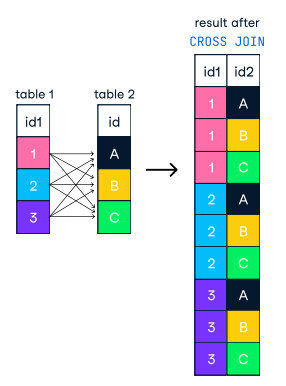

In [93]:
%%dql -t show
DROP TABLE IF EXISTS table_1;
CREATE TABLE IF NOT EXISTS table_1 AS 
SELECT * FROM (
    VALUES 
        (1),
        (2),
        (3) 
    ) AS table_1 (id1);
FROM table_1;

┌───────┐
│  id1  │
│ int32 │
├───────┤
│     1 │
│     2 │
│     3 │
└───────┘



In [88]:
%%dql -t show
DROP TABLE IF EXISTS table_2;
CREATE TABLE IF NOT EXISTS table_2 AS 
SELECT * FROM (
    VALUES ('A'), ('B'), ('C') )AS table_2 (id2);
FROM table_2;

┌─────────┐
│   id2   │
│ varchar │
├─────────┤
│ A       │
│ B       │
│ C       │
└─────────┘



In [90]:
%%dql -t show
SELECT * 
FROM table_1 
CROSS JOIN table_2;

┌───────┬─────────┐
│  id1  │   id2   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ A       │
│     1 │ B       │
│     1 │ C       │
│     2 │ A       │
│     2 │ B       │
│     2 │ C       │
│     3 │ A       │
│     3 │ B       │
│     3 │ C       │
└───────┴─────────┘



In [55]:
%%dql -t show
-- CROSS Join Query as written in cheat sheet
SELECT name, title
FROM artist
CROSS JOIN album;

┌───────────────────┬────────────────────┐
│       name        │       title        │
│      varchar      │      varchar       │
├───────────────────┼────────────────────┤
│ AC/DC             │ For those who rock │
│ AC/DC             │ Dream on           │
│ AC/DC             │ Restless and wild  │
│ AC/DC             │ Let there be rock  │
│ AC/DC             │ Rumours            │
│ Aerosmtih         │ For those who rock │
│ Aerosmtih         │ Dream on           │
│ Aerosmtih         │ Restless and wild  │
│ Aerosmtih         │ Let there be rock  │
│ Aerosmtih         │ Rumours            │
│ Alanis Morissette │ For those who rock │
│ Alanis Morissette │ Dream on           │
│ Alanis Morissette │ Restless and wild  │
│ Alanis Morissette │ Let there be rock  │
│ Alanis Morissette │ Rumours            │
├───────────────────┴────────────────────┤
│ 15 rows                      2 columns │
└────────────────────────────────────────┘



***
## Set Theory Operators in SQL

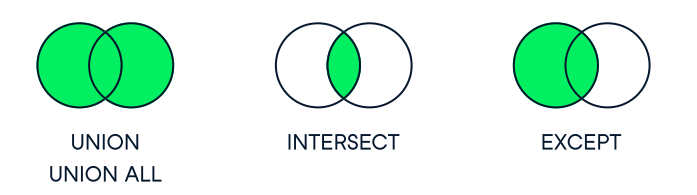

***
## UNION
The UNION operator is used to vertically combine the result of two SELECT statements. For UNION to work without errors, all SELECT statements must have the same number of columns and corresponding columns must have the same data type. UNION  does not return duplicates.

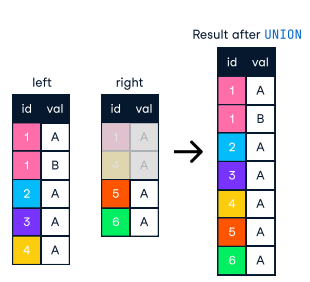

> NOTE: DuckDB will not error if columns do not have the same data type and will convert the column type.

In [97]:
%%dql -t show
DROP TABLE IF EXISTS left_table;
CREATE TABLE IF NOT EXISTS left_table AS 
    SELECT * FROM (
        VALUES 
            (1, 'A'),
            (1, 'B'),
            (2, 'A'),
            (3, 'A'),
            (4, 'A') 
        ) AS left_table (id, val);
FROM left_table;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ A       │
│     1 │ B       │
│     2 │ A       │
│     3 │ A       │
│     4 │ A       │
└───────┴─────────┘



In [98]:
%%dql -t show
DROP TABLE IF EXISTS right_table;
CREATE TABLE IF NOT EXISTS right_table AS 
    SELECT * FROM (
        VALUES 
            (1, 'A'),
            (4, 'A'),
            (5, 'A'),
            (6, 'A') 
        ) AS right_table (id, val);
FROM right_table;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ A       │
│     4 │ A       │
│     5 │ A       │
│     6 │ A       │
└───────┴─────────┘



In [101]:
%%dql -t show
SELECT *
FROM left_table
UNION
SELECT * 
FROM right_table
ORDER BY id, val;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ A       │
│     1 │ B       │
│     2 │ A       │
│     3 │ A       │
│     4 │ A       │
│     5 │ A       │
│     6 │ A       │
└───────┴─────────┘



In [59]:
%%dql -t show
-- UNION
SELECT artist_id
FROM artist
UNION
SELECT artist_id
FROM album
ORDER BY artist_id;

┌───────────┐
│ artist_id │
│   int32   │
├───────────┤
│         1 │
│         2 │
│         3 │
│         6 │
└───────────┘



***
## UNION ALL
The UNION ALL operator works just like UNION, but it returns duplicate values. The same restrictions of UNION
hold true for UNION ALL.

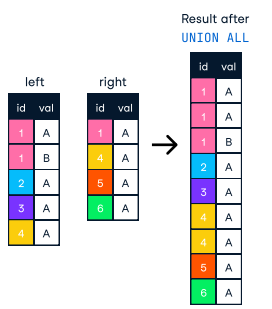

In [102]:
%%dql -t show
SELECT *
FROM left_table
UNION ALL
SELECT * 
FROM right_table
ORDER BY id, val;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ A       │
│     1 │ A       │
│     1 │ B       │
│     2 │ A       │
│     3 │ A       │
│     4 │ A       │
│     4 │ A       │
│     5 │ A       │
│     6 │ A       │
└───────┴─────────┘



In [58]:
%%dql -t show
-- UNION ALL
SELECT artist_id
FROM artist
UNION ALL
SELECT artist_id
FROM album
ORDER BY artist_id;

┌───────────┐
│ artist_id │
│   int32   │
├───────────┤
│         1 │
│         1 │
│         1 │
│         2 │
│         2 │
│         2 │
│         3 │
│         6 │
└───────────┘



***
## INTERSECT
The INTERSECT operator returns only identical rows from two tables.

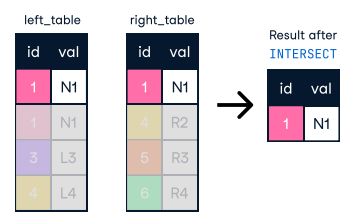


In [104]:
%%dql -t show
-- left_table
DROP TABLE IF EXISTS left_table;
CREATE TABLE IF NOT EXISTS left_table AS 
SELECT * FROM (
        VALUES
        (1, 'N1'),
        (1, 'N1'),
        (3, 'L3'),
        (4, 'L4')
        ) AS left_table (id, val);
FROM left_table;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ N1      │
│     1 │ N1      │
│     3 │ L3      │
│     4 │ L4      │
└───────┴─────────┘



In [105]:
%%dql -t show
-- right_table
DROP TABLE IF EXISTS right_table;
CREATE TABLE IF NOT EXISTS right_table AS 
SELECT * FROM (
        VALUES
        (1, 'N1'),
        (4, 'R2'),
        (5, 'R3'),
        (6, 'R4')
        ) AS right_table (id, val);
FROM right_table;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ N1      │
│     4 │ R2      │
│     5 │ R3      │
│     6 │ R4      │
└───────┴─────────┘



In [106]:
%%dql -t show
-- INTERSECT 
SELECT *
FROM left_table
INTERSECT 
SELECT *
FROM right_table;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ N1      │
└───────┴─────────┘



In [60]:
%%dql -t show
-- INTERSECT 
SELECT artist_id
FROM artist
INTERSECT 
SELECT artist_id
FROM album;

┌───────────┐
│ artist_id │
│   int32   │
├───────────┤
│         1 │
│         2 │
└───────────┘



***
## EXCEPT
The `EXCEPT` operator returns only those rows from the left table that are not present in the right table.

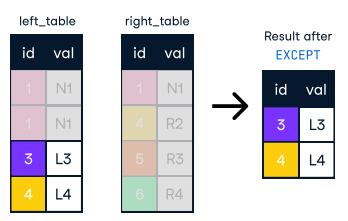

In [107]:
%%dql -t show
-- left_table
DROP TABLE IF EXISTS left_table;
CREATE TABLE IF NOT EXISTS left_table AS 
SELECT * FROM (
        VALUES
        (1, 'N1'),
        (1, 'N1'),
        (3, 'L3'),
        (4, 'L4')
        ) AS left_table (id, val);
FROM left_table;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ N1      │
│     1 │ N1      │
│     3 │ L3      │
│     4 │ L4      │
└───────┴─────────┘



In [108]:
%%dql -t show
-- right_table
DROP TABLE IF EXISTS right_table;
CREATE TABLE IF NOT EXISTS right_table AS 
SELECT * FROM (
        VALUES
        (1, 'N1'),
        (4, 'R2'),
        (5, 'R3'),
        (6, 'R4')
        ) AS right_table (id, val);
FROM right_table;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ N1      │
│     4 │ R2      │
│     5 │ R3      │
│     6 │ R4      │
└───────┴─────────┘



In [109]:
%%dql -t show
-- EXCEPT
SELECT *
FROM left_table
EXCEPT
SELECT *
FROM right_table;

┌───────┬─────────┐
│  id   │   val   │
│ int32 │ varchar │
├───────┼─────────┤
│     3 │ L3      │
│     4 │ L4      │
└───────┴─────────┘



In [110]:
%%dql -t show
-- EXCEPT if we only select id
SELECT id
FROM left_table
EXCEPT
SELECT id
FROM right_table;

┌───────┐
│  id   │
│ int32 │
├───────┤
│     3 │
└───────┘



-- `artist` (left table)
|   artist_id | name              |
|------------:|:------------------|
|           1 | AC/DC             |
|           2 | Aerosmtih         |
|           3 | Alanis Morissette |

-- `album` (right table)
|   album_id | title              |   artist_id |
|-----------:|:-------------------|------------:|
|          1 | For those who rock |           1 |
|          2 | Dream on           |           2 |
|          3 | Restless and wild  |           2 |
|          4 | Let there be rock  |           1 |
|          5 | Rumours            |           6 |

In [61]:
%%dql -t show
-- EXCEPT
SELECT artist_id
FROM artist
EXCEPT
SELECT artist_id
FROM album;

┌───────────┐
│ artist_id │
│   int32   │
├───────────┤
│         3 │
└───────────┘



***
## SEMI JOIN
A semi join chooses records in the first table where a condition is met in the second table. A semi join makes
use of a WHERE clause to use the second table as a filter for the first.

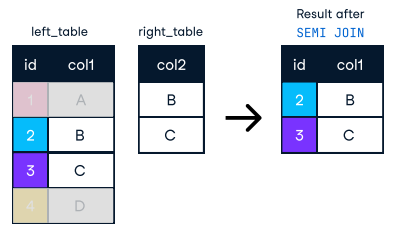

In [113]:
%%dql -t show
-- left_table
DROP TABLE IF EXISTS left_table;
CREATE TABLE IF NOT EXISTS left_table AS 
SELECT * FROM (
        VALUES
        (1, 'A'),
        (2, 'B'),
        (3, 'C'),
        (4, 'D')
        ) AS left_table (id, col1);
FROM left_table;

┌───────┬─────────┐
│  id   │  col1   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ A       │
│     2 │ B       │
│     3 │ C       │
│     4 │ D       │
└───────┴─────────┘



In [114]:
%%dql -t show
-- right_table
DROP TABLE IF EXISTS right_table;
CREATE TABLE IF NOT EXISTS right_table AS 
SELECT * FROM (
        VALUES
        ('B'),
        ('C')
        ) AS right_table (col2);
FROM right_table;

┌─────────┐
│  col2   │
│ varchar │
├─────────┤
│ B       │
│ C       │
└─────────┘



In [115]:
%%dql -t show
SELECT * 
FROM left_table
WHERE col1 IN 
(SELECT col2 
FROM right_table);

┌───────┬─────────┐
│  id   │  col1   │
│ int32 │ varchar │
├───────┼─────────┤
│     2 │ B       │
│     3 │ C       │
└───────┴─────────┘



In [121]:
%%dql -t show
-- Using DuckDB semi join
SELECT * 
FROM left_table lt
SEMI JOIN right_table rt
ON lt.col1 = rt.col2

┌───────┬─────────┐
│  id   │  col1   │
│ int32 │ varchar │
├───────┼─────────┤
│     2 │ B       │
│     3 │ C       │
└───────┴─────────┘



In [112]:
%%dql -t show
-- Query for SEMI JOIN as written in cheat sheet
SELECT * 
FROM album
WHERE artist_id IN 
(SELECT artist_id 
FROM artist);


┌──────────┬────────────────────┬───────────┐
│ album_id │       title        │ artist_id │
│  int32   │      varchar       │   int32   │
├──────────┼────────────────────┼───────────┤
│        1 │ For those who rock │         1 │
│        2 │ Dream on           │         2 │
│        3 │ Restless and wild  │         2 │
│        4 │ Let there be rock  │         1 │
└──────────┴────────────────────┴───────────┘



***
## ANTI JOIN
The anti join chooses records in the first table where a condition is NOT met in the second table. It makes use of a WHERE clause to use exclude values from the second table.

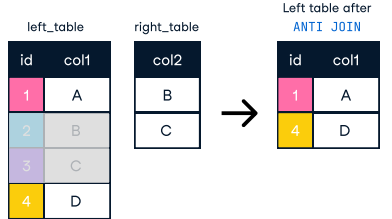

In [118]:
%%dql -t show
-- Query for SEMI JOIN as written in cheat sheet
SELECT * 
FROM left_table
WHERE col1 NOT IN 
(SELECT col2 
FROM right_table);

┌───────┬─────────┐
│  id   │  col1   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ A       │
│     4 │ D       │
└───────┴─────────┘



In [120]:
%%dql -t show
-- using duckdb ANTI JOIN
SELECT * 
FROM left_table lt
ANTI JOIN right_table rt
 ON lt.col1 = rt.col2

┌───────┬─────────┐
│  id   │  col1   │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ A       │
│     4 │ D       │
└───────┴─────────┘



In [117]:
%%dql -t show
-- Query for ANTI JOIN as written in cheat sheet
SELECT * 
FROM album
WHERE artist_id NOT IN 
(SELECT artist_id 
FROM artist);

┌──────────┬─────────┬───────────┐
│ album_id │  title  │ artist_id │
│  int32   │ varchar │   int32   │
├──────────┼─────────┼───────────┤
│        5 │ Rumours │         6 │
└──────────┴─────────┴───────────┘

